In [1]:
%pylab inline
import json
import math
import string
import numpy as np
import pandas as pd
import scipy.stats as stats
from suffix_tree import SuffixTree
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = './'
filename = path + 'dataset_coopometro_livorno_prov_itp_all.json'

In [3]:
# Read individual temporal profiles
data = open(filename, 'r')

shopping_sessions = dict()
footprints = dict()
nbr_pattern = dict()
pur_pattern = dict()
ent_pattern = dict()
shop_entropy = dict()

for row in data:
    try:
        itp = json.loads(row.rstrip('\n'))
        customer_id = itp['customer_id']
        shopping_sessions[customer_id] = itp['npoints']
        footprints[customer_id] = itp['nweeks']
        nbr_pattern[customer_id] = itp['npatterns']
        pur_pattern[customer_id] = purity(itp['patterns_size'].values())
        ent_pattern[customer_id] = entropy(itp['patterns_size'].values(), classes=len(itp['patterns_size'].values()))
        shop_entropy[customer_id] = itp['shop_entropy']
    except:
        continue
data.close()

In [4]:
import pickle
pickle_file = open(path + 'plot_customer_negozio_importo.pkl', 'r')
customer_negozio_importo = pickle.load(pickle_file)
pickle_file.close()

pickle_file = open(path + 'plot_customer_negozio_shopping_sessions.pkl', 'r')
customer_negozio_shopping_sessions = pickle.load(pickle_file)
pickle_file.close()

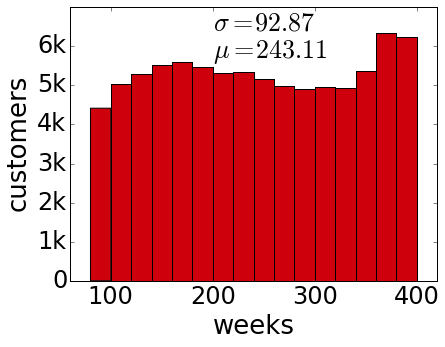

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

plt.hist([v for v in footprints.values() if v >= 80], bins=range(80, 420, 20), color='#ce000c')
plt.ylabel('customers', fontsize=26)
plt.xlabel('weeks', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.yticks(np.arange(0,7000,1000), ['0', '1k', '2k', '3k', '4k', '5k', '6k'])
plt.xticks(np.arange(0,500,100))
plt.xlim([60, 420])

plt.text(200, 5700, r'$\mu=%.2f$' % np.mean([v for v in footprints.values() if v >= 80]), fontsize=26)
plt.text(200, 6400, r'$\sigma=%.2f$' % np.std([v for v in footprints.values() if v >= 80]), fontsize=26)

path_plot = './'
plt.savefig(path_plot + 'ind_dist_fp.png', format='png', bbox_inches='tight')

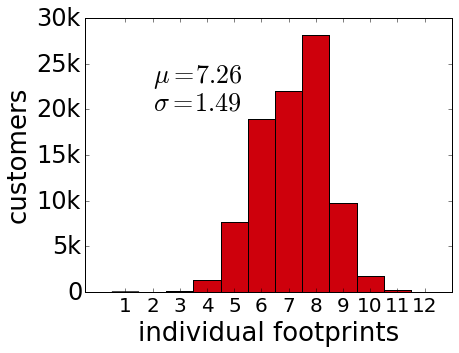

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

set_nbr_patterns = set(nbr_pattern.values())
nbr_diff_nbr_patterns = len(set_nbr_patterns)

plt.hist(nbr_pattern.values(), bins=range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), color='#ce000c')
plt.ylabel('customers', fontsize=26)
plt.xlabel('individual footprints', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xticks(np.asarray(range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns + 1,1)) + 0.5, 
           range(min(set_nbr_patterns)-1,nbr_diff_nbr_patterns,1), fontsize=20)
plt.yticks(np.arange(0,35000,5000), ['0', '5k', '10k', '15k', '20k', '25k', '30k'])

plt.text(2.5, 23000, r'$\mu=%.2f$' % np.mean(nbr_pattern.values()), fontsize=26)
plt.text(2.5, 20000, r'$\sigma=%.2f$' % np.std(nbr_pattern.values()), fontsize=26)

path_plot = './'
plt.savefig(path_plot + 'ind_dist_df.png', format='png', bbox_inches='tight')

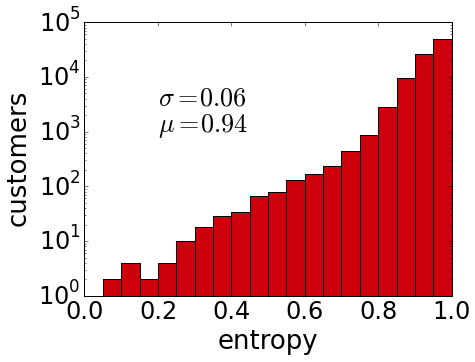

In [251]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

plt.hist(ent_pattern.values(), bins=np.arange(0, 1.05, 0.05), color='#ce000c')
plt.ylabel('customers', fontsize=26)
plt.xlabel('entropy', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.yscale('log')
plt.xlim([0,1])
#plt.xticks(np.asarray(range(min(set_nbr_patterns),nbr_diff_nbr_patterns + 1,1)) + 0.5, 
#           range(min(set_nbr_patterns),nbr_diff_nbr_patterns,1))

plt.text(0.2, 10**3, r'$\mu=%.2f$' % np.mean(ent_pattern.values()), fontsize=26)
plt.text(0.2, 10**3+2*10**3, r'$\sigma=%.2f$' % np.std(ent_pattern.values()), fontsize=26)

path_plot = './'
plt.savefig(path_plot + 'ind_dist_ent.png', format='png', bbox_inches='tight')

In [259]:
from scipy.optimize import curve_fit

def fun(x, a, b):
    return b * np.power(x, a)

values = list()
for v in ent_pattern.values():
    if str(v) != 'nan':
        values.append(v)
        
val, bins = np.histogram(values, bins=np.arange(0, 1.05, 0.05))
xdata = bins[1:]
ydata = val
curve_fit_opt, _ = curve_fit(fun, xdata, ydata)
print curve_fit_opt[0], curve_fit_opt[1]

14.6581601962 50664.7297753


In [262]:
fun(0.9, 14.6581601962, 50664.7297753)

10813.968590803219

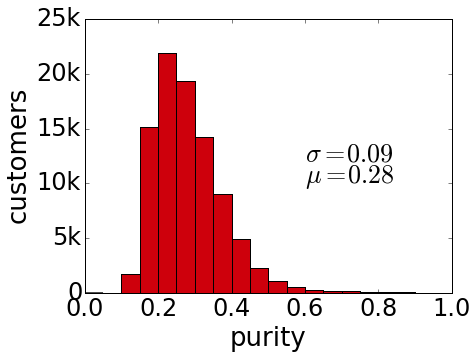

In [250]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

plt.hist(pur_pattern.values(), bins=np.arange(0,1.05, 0.05), color='#ce000c')
plt.ylabel('customers', fontsize=26)
plt.xlabel('purity', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.yscale('log')
#plt.xlim([0,1])
plt.yticks(np.arange(0,30000,5000), ['0', '5k', '10k', '15k', '20k', '25k'])

plt.text(0.6, 10000, r'$\mu=%.2f$' % np.mean(pur_pattern.values()), fontsize=26)
plt.text(0.6, 12000, r'$\sigma=%.2f$' % np.std(pur_pattern.values()), fontsize=26)

path_plot = './'
plt.savefig(path_plot + 'ind_dist_pur.png', format='png', bbox_inches='tight')

In [144]:
val_ni = list()
val_ns = list()
for customer_id in customer_negozio_importo:
    c_negozio_importo = customer_negozio_importo[customer_id]
    c_negozio_ss = customer_negozio_shopping_sessions[customer_id]
    #val_ni.append(entropy(c_negozio_importo.values(), len(c_negozio_importo)))
    #val_ns.append(entropy(c_negozio_ss.values(), len(c_negozio_ss)))
    val_ni.append(purity(c_negozio_importo.values()))
    val_ns.append(purity(c_negozio_ss.values()))
#customer_negozio_shopping_sessions[13]

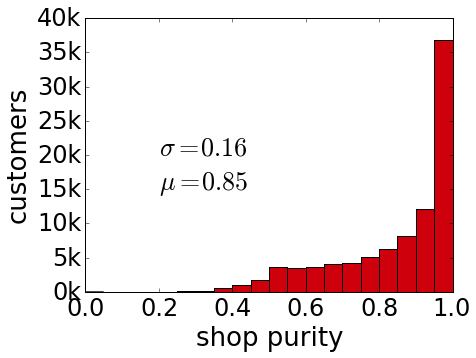

In [255]:
# Per giustificazione no uso negozio plot 1

fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

#val, bins = np.histogram(val_ni, bins=np.arange(0, 1.05, 0.05))
#plt.plot(bins[1:], 1.0 * np.asarray(sorted(np.cumsum(val), reverse=False)), 
#         color='#a50f15', marker='o', linewidth=3, markersize=8)
plt.hist(val_ni, bins=np.arange(0.0, 1.05, 0.05), color='#ce000c')

plt.ylabel('customers', fontsize=26)
plt.xlabel('shop purity', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.yticks(np.arange(0,45000,5000), ['%dk' % (v/1000.0) for v in np.arange(0,45000,5000)])

plt.text(0.2, 15000, r'$\mu=%.2f$' % np.mean(val_ni), fontsize=26)
plt.text(0.2, 20000, r'$\sigma=%.2f$' % np.std(val_ni), fontsize=26)

path_plot = './'
plt.savefig(path_plot + 'exp_setting_dist_pur.png', format='png', bbox_inches='tight')

In [ ]:
# Per giustificazione no uso negozio plot 2

In [174]:
# Leggo res no shop
import gzip
res_noshop = dict()
filename = path + 'dataset_2000_noshop.json.gz'
fin = gzip.open(filename, 'r')
for rec in fin:
    customer = json.loads(rec)
    res_noshop[customer['uid']] = customer
fin.close()

In [175]:
# Leggo res withshop
res_withshop = dict()
filename = path + 'dataset_2000_withshop.json.gz'
fin = gzip.open(filename, 'r')
for rec in fin:
    customer = json.loads(rec)
    if customer['customer_id'] not in res_withshop:
        res_withshop[customer['customer_id']] = dict()
    res_withshop[customer['customer_id']][customer['negozio_id']] = customer
fin.close()

In [178]:
# Calcolo il confronto (faccio i match) prendendo tutti i negozi e poi prendo il peggiore
from distance_functions import *

users_comp = dict()
for uid in res_noshop:
    noshop = res_noshop[uid]['centers']

    user_comp = dict()
    for sid in res_withshop[uid]:
        withshop = res_withshop[uid][sid]['centers']
        distances = cosine_distances2(withshop, noshop)
        min_dist = distances.flatten()[np.argmin(distances)]
        index_withshop, index_noshop = np.unravel_index(distances.argmin(),distances.shape)

        size = res_withshop[uid][sid]['sizes'][index_withshop]
        value = size * min_dist 
        # tanto piu grande il cluster e maggiore la distanza peggio e'

        user_comp[min_dist] = value

    users_comp[uid] = user_comp

In [180]:
# Prende il max
values_match_dist = list()
for uid in users_comp:
    values_match_dist.append(max(users_comp[uid], key=users_comp[uid].get))

In [184]:
# Visualizza statistiche
from calculate_aggregate_statistics import *
calculate_aggregate(values_match_dist)
# Fare box plot ma la media e' gia sotto lo 0.1 di distanza

{'10p': 0.0,
 '25p': 0.0011865187670412891,
 '50p': 0.0079765669338726086,
 '75p': 0.076442903442862781,
 '90p': 0.41268139876065396,
 'avg': 0.096896934365017132,
 'cov': 0.52700266380860539,
 'gin': 0.78809304227502675,
 'iqm': 0.015235077153957359,
 'iqr': 0.075256384675821492,
 'kur': 4.494412841579857,
 'mad': 0.1304554531713257,
 'med': 0.0079765669338726086,
 'skw': 2.2475888866053695,
 'std': 0.18386422122565924,
 'var': 0.033806051846918164}

In [188]:
# Calcolo il confronto prendendo il negozio piu' frequentato
from distance_functions import *


users_comp_most_visited = dict()
for uid in res_noshop:
    noshop = res_noshop[uid]['centers']
    
    #shop_id_size = dict()
    #for sid in res_withshop[uid]:
    #    shop_id_size[sid] = sum(res_withshop[uid][sid]['sizes'])
    shop_id_size = customer_negozio_importo[uid]
    shop_id_most_visited = max(shop_id_size, key=shop_id_size.get)
    withshop = res_withshop[uid][shop_id_most_visited]['centers']
    
    distances = cosine_distances2(withshop, noshop)
    min_dist = distances.flatten()[np.argmin(distances)]
    #print np.argmin(distances), min_dist

    users_comp_most_visited[uid] = min_dist

In [189]:
# Visualizza statistiche negozio piu' frequetato
calculate_aggregate(users_comp_most_visited.values())

{'10p': 0.0,
 '25p': 4.7883159856904056e-05,
 '50p': 0.0015240359893801125,
 '75p': 0.005956696131379724,
 '90p': 0.017329460505596479,
 'avg': 0.0070419047370237466,
 'cov': 0.39761080837802271,
 'gin': 0.78293947988596091,
 'iqm': 0.001939854534366101,
 'iqr': 0.0059088129715228199,
 'kur': 52.814159398670675,
 'mad': 0.0086648207098742273,
 'med': 0.0015240359893801125,
 'skw': 6.108943107589555,
 'std': 0.017710546566251182,
 'var': 0.00031366345967535154}

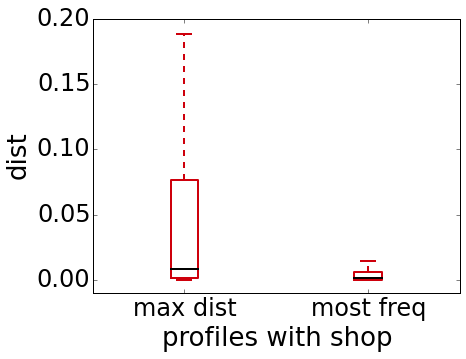

In [240]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

bp = plt.boxplot([values_match_dist, users_comp_most_visited.values()], showfliers=False)
plt.ylabel('dist', fontsize=26)
plt.xlabel('profiles with shop', fontsize=26)
plt.xticks([1, 2], ['max dist', 'most freq'], fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.setp(bp['boxes'], color='#ce000c', linewidth=2)
plt.setp(bp['medians'], color='k', linewidth=2)
plt.setp(bp['whiskers'], color='#ce000c', linewidth=2)
plt.setp(bp['fliers'], color='#ce000c', linewidth=2)
plt.setp(bp['caps'], color='#ce000c', linewidth=2)

plt.ylim([-0.01, 0.2])

path_plot = ./'
plt.savefig(path_plot + 'exp_setting_bp_dist.png', format='png', bbox_inches='tight')

In [221]:
a_list = list()
b_list = list()

for customer_id in users_comp_most_visited:
    a_list.append(users_comp_most_visited[customer_id])
    b_list.append(purity(customer_negozio_importo[customer_id].values()))

In [223]:
# Correlazione distanza most frequent visit e purita
# non ce' correlazione --> il profilo temporale che esce usando lo shop piu' frequentato oppure non considerando 
# il negozio, sono molto simili a prescindere che l'utente e' puro w.r.t. shop o che non lo e' 

pearsonr(a_list, b_list)

(-0.10885245982525958, 1.063596654000652e-06)

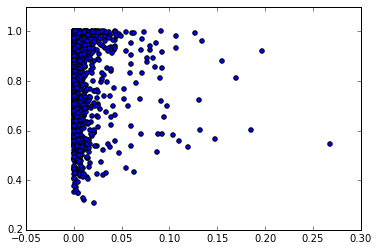

In [226]:
#plt.hexbin(a_list, b_list, cmap='Reds', gridsize=50)
plt.scatter(a_list, b_list)

(array([  0.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   1.20000000e+01,   6.30000000e+01,
          2.60000000e+02,   6.61000000e+02,   1.17900000e+03,
          2.22600000e+03,   4.16500000e+03,   4.17600000e+03,
          4.03900000e+03,   4.31000000e+03,   4.87600000e+03,
          5.35300000e+03,   6.48800000e+03,   8.00100000e+03,
          1.17320000e+04,   3.34200000e+04]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

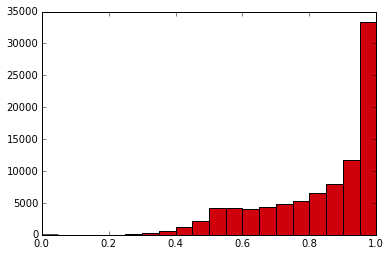

In [146]:
plt.hist(val_ns, bins=np.arange(0.0, 1.05, 0.05), color='#ce000c')

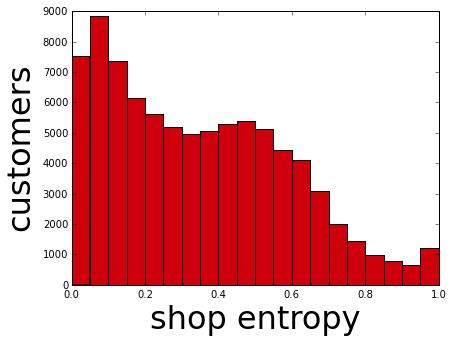

In [126]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.14)

plt.hist([x for x in shop_entropy.values() if str(x) != 'nan'], bins=np.arange(0.0, 1.05, 0.05), color='#ce000c')
plt.ylabel('customers', fontsize=32)
plt.xlabel('shop entropy', fontsize=32)
#plt.tick_params(axis='both', which='major', labelsize=24)
#plt.yscale('log')
#plt.xlim([0,1])
#plt.yticks(np.arange(0,25000,5000), ['0', '5k', '10k', '15k', '20k'])

#plt.text(0.6, 10000, r'$\mu=%.2f$' % np.mean(pur_pattern.values()), fontsize=32)
#plt.text(0.6, 12000, r'$\sigma=%.2f$' % np.std(pur_pattern.values()), fontsize=32)

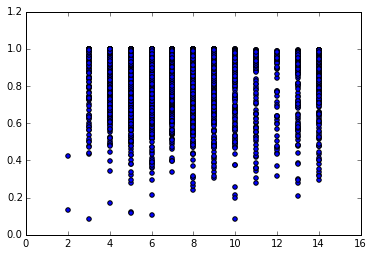

In [90]:
plt.scatter(nbr_pattern.values(), ent_pattern.values())
#plt.hexbin(nbr_pattern.values(), ent_pattern.values(), cmap='Reds', gridsize=10)

(array([  1.80000000e+01,   5.30000000e+01,   1.31000000e+02,
          1.62000000e+02,   2.54000000e+02,   4.93000000e+02,
          9.28000000e+02,   1.61400000e+03,   2.33800000e+03,
          2.87100000e+03,   3.25100000e+03,   3.61900000e+03,
          3.89500000e+03,   3.97400000e+03,   3.98100000e+03,
          3.94400000e+03,   4.06800000e+03,   3.85900000e+03,
          3.46400000e+03,   3.55600000e+03,   3.56700000e+03,
          3.29800000e+03,   3.07800000e+03,   3.01900000e+03,
          2.84800000e+03,   2.74600000e+03,   2.50500000e+03,
          2.44400000e+03,   2.13800000e+03,   2.03700000e+03,
          1.82000000e+03,   1.69100000e+03,   1.53800000e+03,
          1.39400000e+03,   1.24300000e+03,   1.09300000e+03,
          1.01700000e+03,   8.55000000e+02,   7.29000000e+02,
          6.72000000e+02,   5.81000000e+02,   5.03000000e+02,
          4.43000000e+02,   3.91000000e+02,   3.04000000e+02,
          3.12000000e+02,   2.31000000e+02,   2.08000000e+02,
        

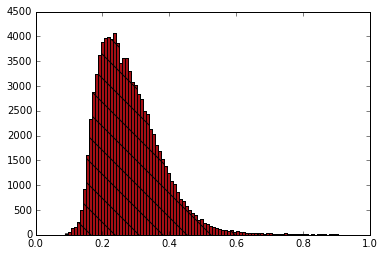

In [44]:
plt.hist(pur_pattern.values(), bins=100, color='#a50f15', hatch='\\', label='mad')

In [6]:
itp.keys()

[u'shop_freq',
 u'customer_id',
 u'nweeks',
 u'month_entropy',
 u'patterns_size',
 u'ts_patterns',
 u'month_freq',
 u'patterns_nbaskets',
 u'ts_entropy',
 u'dow_patterns',
 u'patterns',
 u'dow_freq',
 u'month_patterns',
 u'npoints',
 u'pattern_seq',
 u'npatterns',
 u'shop_patterns',
 u'shop_entropy',
 u'dow_entropy',
 u'ts_freq']

In [14]:
itp['shop_entropy'], itp['ts_entropy'], itp['dow_entropy']

(0.08369826142336764, 0.47500806418217134, 0.9141985144073053)

In [11]:
itp['nweeks'], itp['npoints'], itp['npatterns']

(136, 316, 6)

In [31]:
np.sum([np.sum(v) for v in itp['patterns_nbaskets'].values()])

316

In [19]:
itp['patterns_size'], np.sum(itp['patterns_size'].values())

({u'0': 23, u'1': 22, u'2': 29, u'3': 21, u'4': 21, u'5': 20}, 136)

In [20]:
def purity(values):
    return 1.0 * np.max(values) / np.sum(values)

In [21]:
def entropy(x, classes=None):
    val_entropy = 0
    n = np.sum(x)
    for freq in x:
        if freq == 0:
            continue
        p = 1.0 * freq / n
        val_entropy -= p * np.log2(p)
    if classes is not None:
        val_entropy /= np.log2(classes)
    return val_entropy

In [25]:
purity(itp['patterns_size'].values()), entropy(itp['patterns_size'].values(), classes=len(itp['patterns_size'].values()))

(0.21323529411764705, 0.99542968452418257)

In [294]:
x = np.zeros(35)
y = np.zeros(35)
z = np.zeros(35)
x[4] = 10
y[4] = 10
z[4] = 10
x[10] = 100
y[10] = 10
z[20] = 100
print cosine_distance2(x, y)
print cosine_distance2(x, z)

0.226042700797
0.990099009901


In [288]:
x

array([ 0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [286]:
y

array([   0.,    0.,    0.,    0.,    5.,    0.,    0.,    0.,    0.,
          0.,  100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])

In [278]:
sum(a*b for a, b in zip(x, y))

5000.0

In [279]:
math.sqrt(sum([a*a for a in x])) * math.sqrt(sum([a*a for a in y]))

5000.0